In [11]:
from PIL import Image
import pytesseract
import numpy as np
import os
pytesseract.pytesseract.tesseract_cmd = os.path.join('E:', os.sep,'Tesseract-OCR','tesseract')

In [12]:
filename = os.path.join("..","test-data","book_shelf.jpg")
img1 = np.array(Image.open(filename))
text = pytesseract.image_to_string(img1)

In [13]:
print(text)

RARUKI MURAKAMI

The Adventures of

IBN BATTUTA

Max Tegmark 4 tm
Our Mathematical Universe
ya SON OF THE STARS 2007

DUNE

Sa TIN 3NITIOVN BID 8ID \

Whe NMR ERS
AMARA
NDA




In [4]:
import cv2
import numpy as np
import os
filename = os.path.join("..","test-data","book_shelf.jpg")
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
x1_np, x2_np, y1_np, y2_np = np.array([]),np.array([]),np.array([]),np.array([])
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    x1_np = np.append(x1_np, x1)
    x2_np = np.append(x2_np, x2)
    y1_np = np.append(y1_np, y1)
    y2_np = np.append(y2_np, y2)
    #cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

# cv2.imwrite('houghlines3.jpg',img)

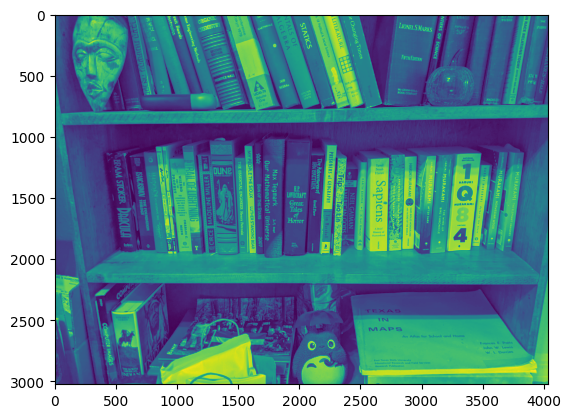

In [10]:
import matplotlib.pyplot as plt
plt.imshow(gray)